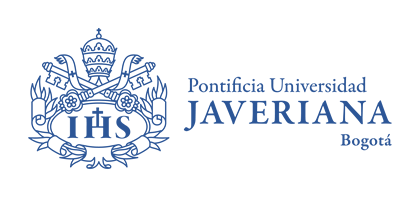


# Aprendizaje de máquina - Ejercicio PCA
Los modelos de reducción dimensional permiten reducir la redundancia de los datos de entrada, proyectando los datos a un espacio dimensional menor que permite visualizar los resultados y eventualmente usar otros modelos a partir de estos datos.

Los objetivos de este notebook son los siguientes:

*   Ver algunos ejemplos de uso de PCA utilizando la librería sklearn en python
*   Aplicar PCA para reducción dimensional sobre un dataset multivariado


**Créditos**

Este notebook esta adaptado a partir del contenido del libro  Python Data Science Handbook de Jake VanderPlas disponible en Github [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).

* El libro esta liberado bajo licencia creative commons [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode)

En este notebook revisaremos el uso de PCA a diversos problemas  como visualización, filtrado de ruido, ingeniería de características entre otros.

Iniciamos importando algunas librerias

In [1]:
#pip install scikit-learn=='1.0'

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introducción a  PCA

Consideremos los siguientes puntos 

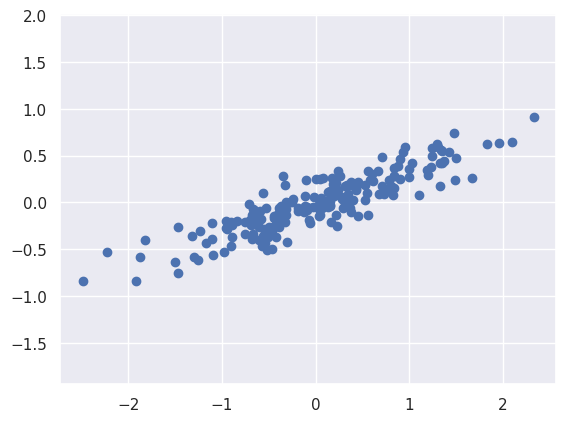

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

En PCA, nuestro objetivo es encontrar los principales ejes ortogonales sobre los cuáles podemos reflejar el conjunto de datos original .


Para usar ``PCA`` en scikit-learn, podemos usar el siguiente código:

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

El método fit aprende los eigenvalores y eigenvectores que nos sirven para reflejar los datos sobre un nuevo espacio vectorial, podemos accederlo usando los siguientes métodos:

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
# Deberían ser vectores ortogonales 
np.round(np.dot(pca.components_[0], pca.components_[1]),4)

-0.0

Varianza explicada por cada nuevo eigenvector

In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [7]:
pca.explained_variance_/np.sum(pca.explained_variance_)

array([0.97634101, 0.02365899])

Porcentaje de varianza explicada por cada eigenvector

In [8]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


In [9]:
pca.mean_

array([ 0.03351168, -0.00408072])

Reflejemos en un gráfico los eigenvectores, con una magnitud proporcional al eigenvalor del gráfico.


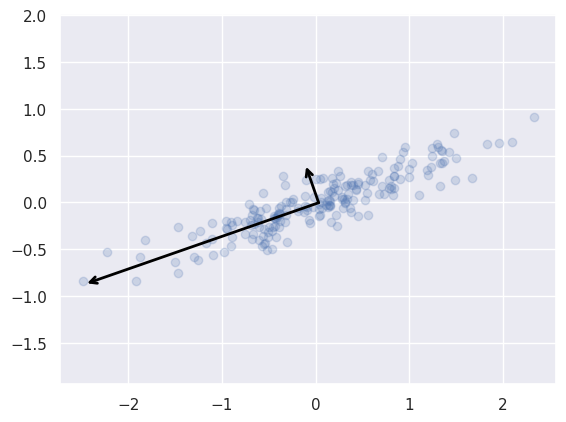

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="black")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [11]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [12]:
np.dot(X,pca.components_)[0:5]

array([[ 0.64645981,  0.04487173],
       [-1.10152335,  0.24237319],
       [ 0.69760294, -0.18353681],
       [ 2.27933193,  0.2291997 ],
       [ 0.5997429 , -0.31952258]])

In [13]:
pca.transform(X)[0:5]

array([[ 0.67676923,  0.0597386 ],
       [-1.07121393,  0.25724006],
       [ 0.72791236, -0.16866994],
       [ 2.30964136,  0.24406657],
       [ 0.63005232, -0.30465571]])

Estos componentes representan la mejor rotación para maximizar la varianza de las dimensiones, y su magnitud nos indica qué tan importantes son.

Si dibujamos los componentes principales y los datos proyectados a estos componentes, podemos evidenciar qué pasa con la tranformación de los datos.

[Text(0.5, 0, 'component 1'),
 Text(0, 0.5, 'component 2'),
 Text(0.5, 1.0, 'principal components'),
 (-5.0, 5.0),
 (-3.0, 3.1)]

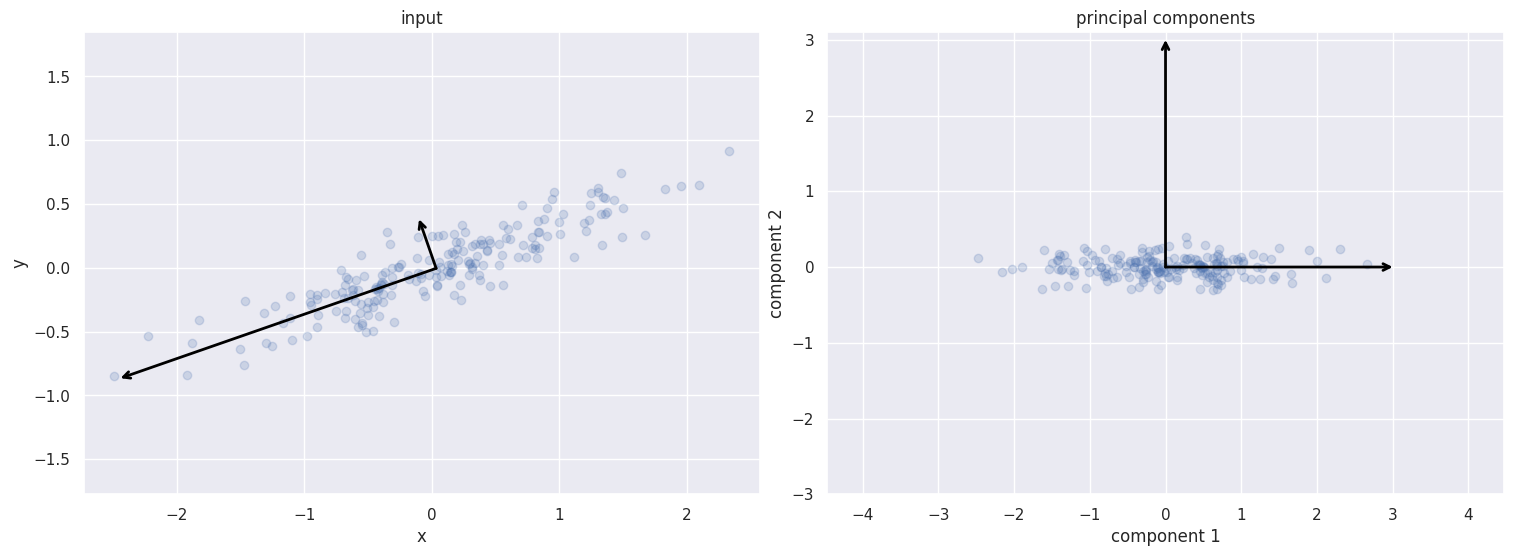

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

A este tipo de transformaciones se les conoce como  una *transformación afín*, (rotar, escalar y transladar cada punto).


### PCA como herramienta para reducción dimensional

Utilizando PCA para reducción dimensional implica descartar los componentes que expliquen menos varianza.

En las siguientes celdas, podemos observar este proceso:

El método ``transform`` nos permite reflejar los datos en la dimensionalidad requerida

In [15]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Los datos han sido reducidos de 2 a 1 dimensión.

La función ``inverse_transform`` permite reflejar los datos utilizando los componentes aprendidos en la dimensionalidad original 

A continuación vemos el efecto que tiene la transformación sobre 1 solo componente de vuelta en el espacio vectorial original, a esto se le conoce como la reconsturcción del dato sobre las dimensiones originales


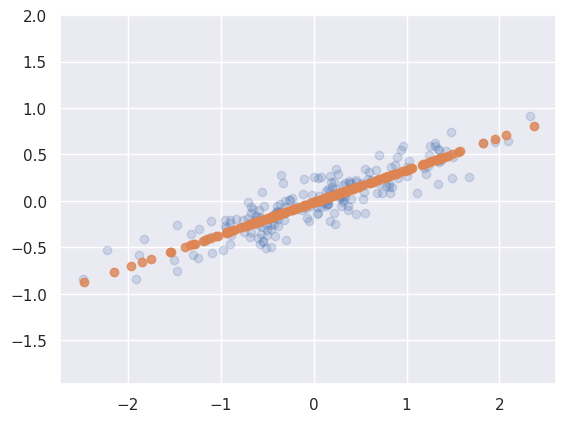

In [16]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Los puntos azules son los datos originales, mientras que los datos naranja son los datos proyectados de vuelta sobre el espacio dimensional original utilizando como base normal los eigenvectores aprendidos

Podemos observar claramente qué pasa, al pasar los datos de ida y vuelta por el método, quita la información de la dimensión (o dimensiones) menos significativa(s).

El porcentaje de varianza explicada por los últimos componentes es la información que descartamos, pese a descartar la mitad de las dimensiones, podemos conservar de manera adecuada la relación de distancia entre los puntos

### PCA como herramienta para visualización

La utilidad percibida de PCA puede ser mayor el modelos de alta dimensionalidad.Importemos el dataset [digits](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)


In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape 

(1797, 64)

In [18]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

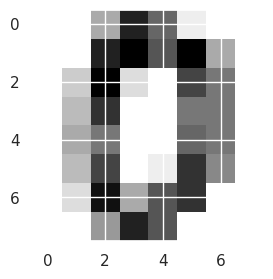

In [19]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [20]:
digits.target[0]

0

In [21]:
digits.images[32]

array([[ 0.,  2., 13., 16., 16., 16., 11.,  0.],
       [ 0.,  5., 16., 10.,  5.,  4.,  1.,  0.],
       [ 0.,  6., 16.,  7.,  3.,  0.,  0.,  0.],
       [ 0.,  9., 16., 16., 16.,  6.,  0.,  0.],
       [ 0.,  3.,  8.,  4., 11., 15.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16.,  6.,  0.,  0.],
       [ 0.,  2., 16., 15.,  8.,  0.,  0.,  0.]])

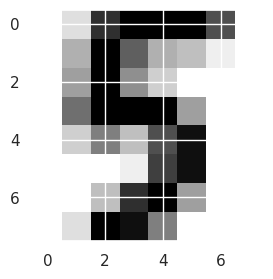

In [22]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[32], cmap=plt.cm.gray_r, interpolation='nearest')

In [23]:
digits.target[32]

5

El dataset consiste en imágenes de 8x8 pixeles en escala de gris, que reflejan diferentes formas de escribir dígitos. Usemos PCA para reflejar estos datos 64 dimensionales en solo 2 dimensiones.


In [24]:
digits.data[0].shape

(64,)

In [25]:
pca = PCA(2)  # proyectar 64 pixeles en 2 dimensiones
model = pca.fit(digits.data)
projected = model.transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [26]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [27]:
projected[32]

array([-5.02024116, -3.59829147])

Dibujemos cada imagen en el espacio dimensional generado por las imágenes de los dígitos

/tmp/ipykernel_227280/2175666399.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab10', 10))


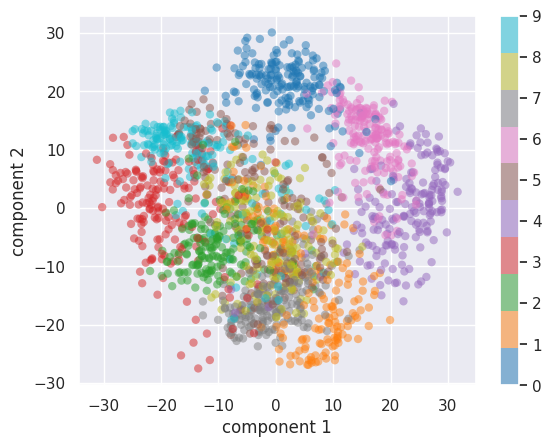

In [28]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Estamos observando datos 64 dimensionales en 2 dimensiones, observe las distancias entre los dígitos y recuerde que no se utilizaron las etiquetas como herramienta para encontrar los eigenvectores sobre los cuales vamos a reflejar los datos.


## ¿Qué representa cada componente?

La transformación de cada dato depende de la tranformación de cada dato bajo cada eigenvector escogido. Consideremos $x$ como la imagen 64 dimensional:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Una forma mediante la cual podemos pensar en los eigenvectores es una base de transformación de pixeles unidimensional (pixel1, pixel2, pixel3, ..., pixel64). Para construir un pixel transformado podemos usar la base de tranformación de pixel unidimensional y sumarlos uno a uno para la construcción de la imagen final.


$$
{\rm image}(x) = \bar{x} + x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$


In [29]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest', cmap=plt.cm.gray_r,)
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig


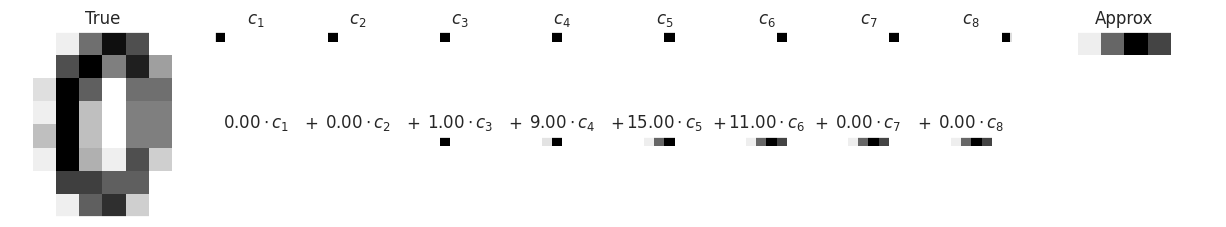

In [30]:
fig = plot_pca_components(digits.data[10],
                          show_mean=False)

Usando solamente 8 bases de pixel, podemos reconstruir la parte superior de la imagen (la magnitud de la base esta representada por su intensidad)

Si usamos la base vectorial extraida (basis1, basis2, basis3,.. basis64) por pca, podemos construir una matriz de pixeles a partir de la contribución de cada base.

$$
image(x) = \bar{x} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

Si tomamos 8 bases, podemos realizar una proyección de los datos bajo una dimensionalidad reducida.

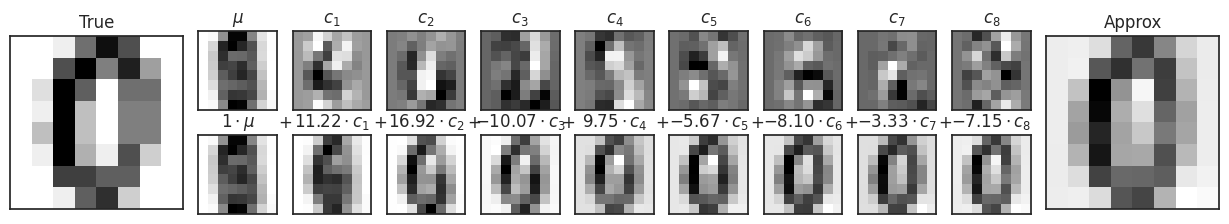

In [31]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)

In [32]:
Xproj[10]

array([ 11.21514953,  16.91973792, -10.06653466,   9.74824419,
        -5.67189947,  -8.0952715 ,  -3.33339621,  -7.14629313])

In [33]:
pca.mean_.shape

(64,)

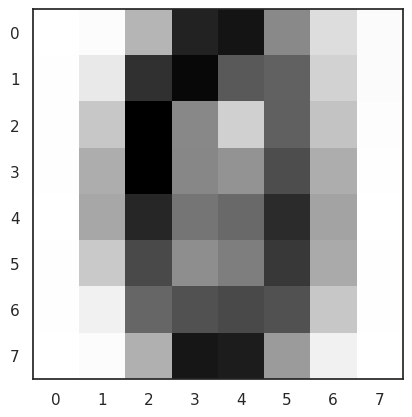

In [34]:
plt.imshow((pca.mean_+ Xproj[10][0]*pca.components_[0]+Xproj[10][1]*pca.components_[1]+Xproj[10][2]*pca.components_[2]+Xproj[10][3]*pca.components_[3]+pca.mean_).reshape((8,8)), interpolation='nearest', cmap=plt.cm.gray_r)

### Escogiendo las dimensiones adecuadas

Una parte vital de PCA es escoger el número de dimensiones en las cuales vamos a reducir.

Esto puede ser estimado mediante los valores de los eigenvalores, dado que nos cuentan cuánta varianza estan recogiendo del dataset original.

En sklearn, podemos observar el atributo ``explained_variance_ratio`` 

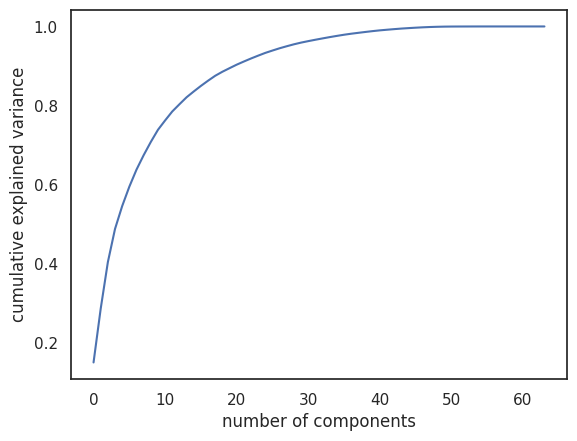

In [35]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [36]:
np.round(pca.explained_variance_ratio_,4)

array([1.489e-01, 1.362e-01, 1.179e-01, 8.410e-02, 5.780e-02, 4.920e-02,
       4.320e-02, 3.660e-02, 3.350e-02, 3.080e-02, 2.370e-02, 2.270e-02,
       1.820e-02, 1.770e-02, 1.470e-02, 1.410e-02, 1.320e-02, 1.250e-02,
       1.020e-02, 9.100e-03, 8.900e-03, 8.000e-03, 7.700e-03, 7.200e-03,
       7.000e-03, 6.000e-03, 5.800e-03, 5.200e-03, 4.900e-03, 4.300e-03,
       3.700e-03, 3.500e-03, 3.400e-03, 3.300e-03, 3.100e-03, 2.900e-03,
       2.600e-03, 2.300e-03, 2.200e-03, 2.100e-03, 1.900e-03, 1.600e-03,
       1.500e-03, 1.400e-03, 1.200e-03, 1.100e-03, 1.000e-03, 8.000e-04,
       6.000e-04, 4.000e-04, 2.000e-04, 1.000e-04, 1.000e-04, 1.000e-04,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

In [37]:
pca.components_[:,0:10].shape

(64, 10)

In [38]:
np.round(np.cumsum(pca.explained_variance_ratio_),4)

array([0.1489, 0.2851, 0.403 , 0.4871, 0.545 , 0.5941, 0.6373, 0.6739,
       0.7074, 0.7382, 0.762 , 0.7847, 0.8029, 0.8206, 0.8353, 0.8494,
       0.8626, 0.8751, 0.8852, 0.8943, 0.9032, 0.9112, 0.9188, 0.9261,
       0.933 , 0.939 , 0.9447, 0.9499, 0.9548, 0.9591, 0.9628, 0.9664,
       0.9697, 0.973 , 0.9761, 0.979 , 0.9816, 0.9839, 0.9861, 0.9882,
       0.9901, 0.9917, 0.9932, 0.9946, 0.9958, 0.9968, 0.9978, 0.9986,
       0.9991, 0.9995, 0.9998, 0.9998, 0.9999, 0.9999, 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ])

La curva nos indica cumulativamente cuánta varianza acumula cada componente en los primeros $N$ componentes. 

Por ejemplo, los primeros 10 componentes acumulan alrededor de 75% del total de la varianza y alrededor de 20 componentes ya tenemos representada alrededor de 90% de la varianza, también vemos que a partir del componente 50 ya se recoge el 100% de la varianza original de los datos.


## PCA como herramienta para reducción de ruido

PCA puede ser utilizado para reducir el ruido de información ruidosa 
La principal idea es, los datos que no se ven reflejados facilmente por la reducción dimensional deben ser datos con ruido, por lo tanto al descartar las ultimas dimensiones estamos descartando en parte el ruido sobre el conjunto de datos.

Revisemos esto sobre el dataset de dígitos

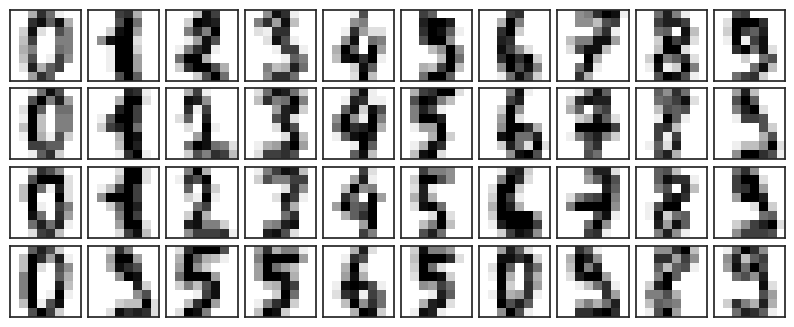

In [39]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ahora añadamos ruido y repitamos el proceso

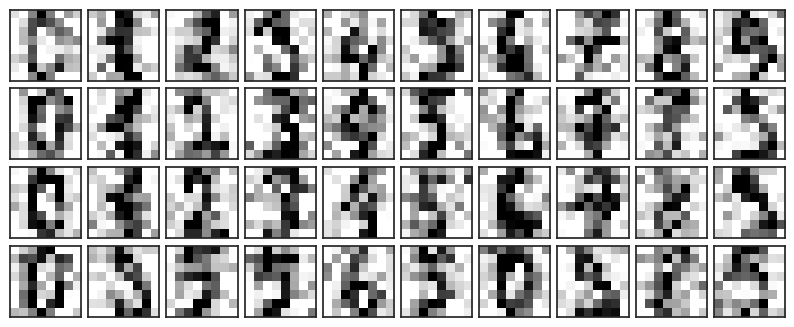

In [40]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Es fácil distiguir que hay pixeles con ruido en algunas imágenes

Entrenemos PCA sobre los datos con ruido, conservando el 50% de la varianza.

In [41]:
pca_2 = PCA(0.50).fit(noisy)
pca_2.n_components_

12

El 50% de la varianza corresponde a 12 componentes principales. Reproyectemos las imágenes sobre el espacio original de vuelta utilizando lo aprendido

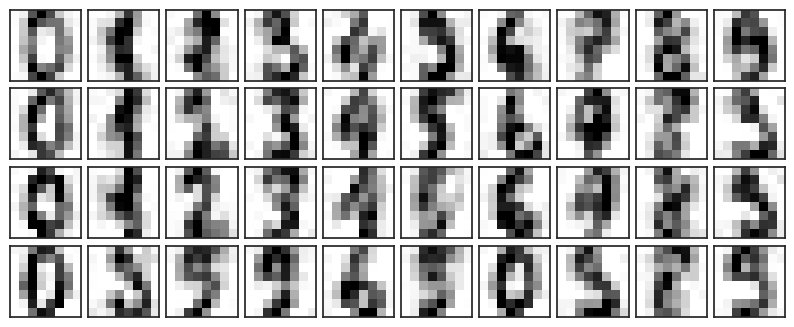

In [42]:
components = pca_2.transform(noisy)
filtered = pca_2.inverse_transform(components)
plot_digits(filtered)

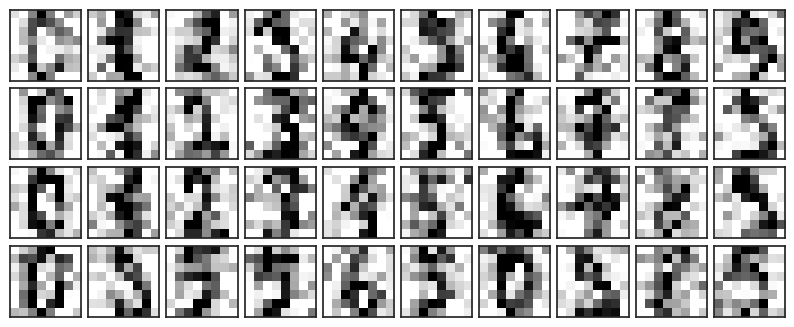

In [43]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Esta propiedad de reducción de ruido nos permite utilizar, por ejemplo, modelos supervisados para clasificación o regresión, retirando de los datos posible ruido sobre la señal

## Example: Eigenfaces

Vamos a tomar algunas imágenes del dataset de fotos de scikitlearn y vamos a aprender una representación de menor dimensionalidad sobre los datos,


In [44]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 62, 47)


In [45]:
62*47

2914

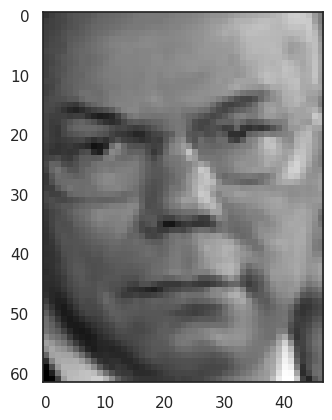

In [46]:
plt.imshow(faces.images[5],
                  cmap='binary_r', interpolation='nearest',
                  )

Realicemos una descomposición PCA de las imágenes y revisemos el resultado que obtenemos. Como este dataset es un poco más grande, vamos a usar otra técnica llamada Randomized PCA. Randomized PCA aproxima un número determinado de componentes mediante el muestreo de partes de X y la aplicación de modelos de factorización de matrices (parecido a SVD)

Tomaremos entonces los primeros 150 componentes:

In [47]:

pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

En este caso queremos observar las imágenes asociadas a los primeros componentes (eigenvectores). A estas imágenes se les conoce como "eigencaras" (eigenfaces) por la comunidad de reconocimiento de imágenes en los 80's. 

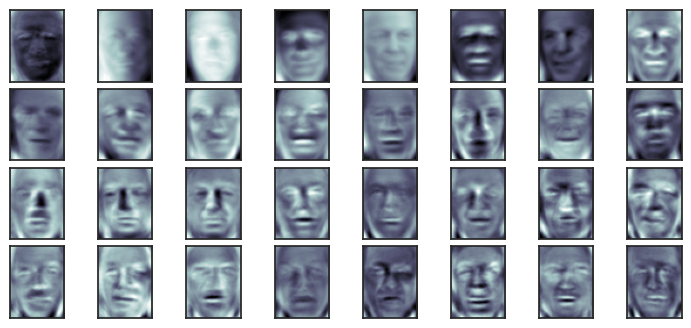

In [48]:
fig, axes = plt.subplots(4, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Al revisar la distribución cumulativa de la varianza, podemos observar que el 90% de la varianza de las imágenes se mantiene con 150 dimensiones.

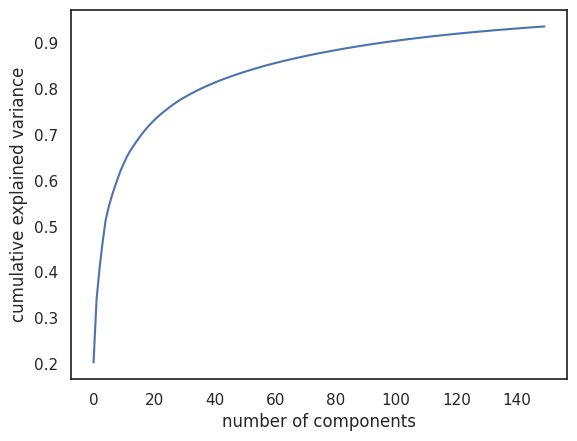

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Comparemos entonces las imágenes originales vs las imágenes transformadas de vuelta utilizando los vectores encontrados.

In [50]:
print(f'Foto original mide {faces.data[0].shape}')
# Components tiene las imágenes reducidas a 150 dimensiones
components = pca.transform(faces.data)
print(f'Foto reducida mide {components[0].shape}')
# Inverse transform vuelve y refleja cada elemento de 150 dimensiones en el espacio original
projected = pca.inverse_transform(components)
print(f'Foto reproyectada mide {projected[0].shape}')

Foto original mide (2914,)
Foto reducida mide (150,)
Foto reproyectada mide (2914,)


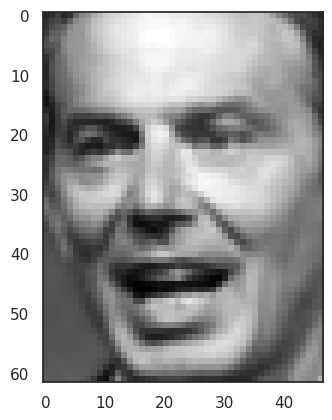

In [51]:
plt.imshow(faces.data[1].reshape(62, 47), cmap='binary_r')

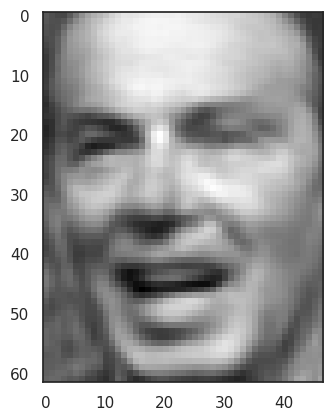

In [52]:
plt.imshow(projected[1].reshape(62, 47), cmap='binary_r')

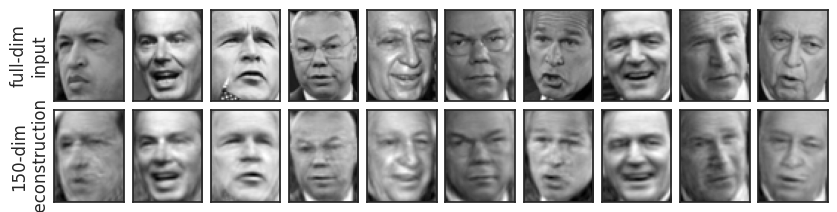

In [53]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

Al reducir la dimensionalidad, podemos por ejemplo correr un algoritmo de aprendizaje supervisado sobre las imágenes para detectar de quién se trata.

In [54]:
faces.target

array([5, 6, 3, ..., 5, 3, 5])

In [55]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    faces.data, faces.target, test_size=0.2, random_state=42, stratify=faces.target)
# Transformamos datos 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.001,0.005, 0.01, 0.1,'scale'], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)

print(clf.best_estimator_)

y_pred = clf.best_estimator_.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=faces.target_names))
n_classes = faces.target_names.shape[0]
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


SVC(C=1000.0, class_weight='balanced', gamma=0.005)
                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.69      0.71        16
     Colin Powell       0.79      0.94      0.85        47
  Donald Rumsfeld       0.71      0.62      0.67        24
    George W Bush       0.87      0.88      0.87       106
Gerhard Schroeder       0.75      0.82      0.78        22
      Hugo Chavez       0.90      0.64      0.75        14
       Tony Blair       0.92      0.79      0.85        29

         accuracy                           0.83       258
        macro avg       0.81      0.77      0.78       258
     weighted avg       0.83      0.83      0.82       258

[[11  0  1  2  1  1  0]
 [ 1 44  0  1  0  0  1]
 [ 0  2 15  5  1  0  1]
 [ 0  8  4 93  1  0  0]
 [ 1  0  1  2 18  0  0]
 [ 1  1  0  2  1  9  0]
 [ 1  1  0  2  2  0 23]]


## Ejercicio

En esta sección hemos visto cómo utilizar PCA para visualizar un conjunto de datos multidimensional, y para correr modelos de clasificación y regresión de forma más sencilla, ya que disminuimos la complejidad computacional de los métodos utilizados.

La idea del ejercicio es realizar el análisis de varianza, visualización y clasificación (con el método que considere conveniente) 

In [57]:
from sklearn.datasets import load_breast_cancer

breast_cancer=load_breast_cancer(as_frame=True)

In [58]:
breast_cancer.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [59]:
data = breast_cancer.data
target = breast_cancer.target
target_names = breast_cancer.target_names
# Se ajusta el modelo a los datos
pca_breast_cancer = PCA().fit(data)

#### Visualización de la varianza explicada acumulada vs el número de componentes

In [60]:
breast_cancer_cum_variance_ratio = np.cumsum(pca_breast_cancer.explained_variance_ratio_)
breast_cancer_cum_variance_ratio

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [61]:
pca_breast_cancer.components_.shape

(30, 30)

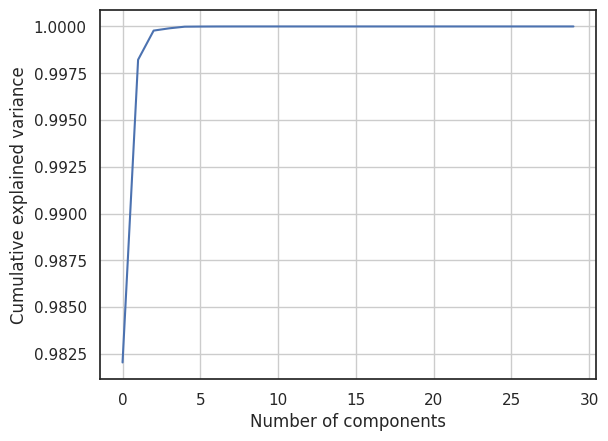

In [62]:
plt.plot(breast_cancer_cum_variance_ratio)
plt.grid(True)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
# index_90 = np.argmax(breast_cancer_cum_variance_ratio>= 0.9)
# plt.scatter(index_90,0.9, color='red', label='90{%} de la varianza')
plt.show()

Análisis de varianza con PCA:

El primer componente principal explica aproximadamente el 98.2% de la varianza.
El segundo componente principal explica un 1.62% adicional.
Con solo los dos primeros componentes principales, hemos capturado aproximadamente el 99.82% de la varianza total.


In [63]:
breast_cancer_cum_variance_ratio

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

### Visualización de los datos proyectados en 2D (2 componentes)

In [64]:
projected_breast_cancer = pca_breast_cancer.transform(data)
projected_breast_cancer.shape

(569, 30)

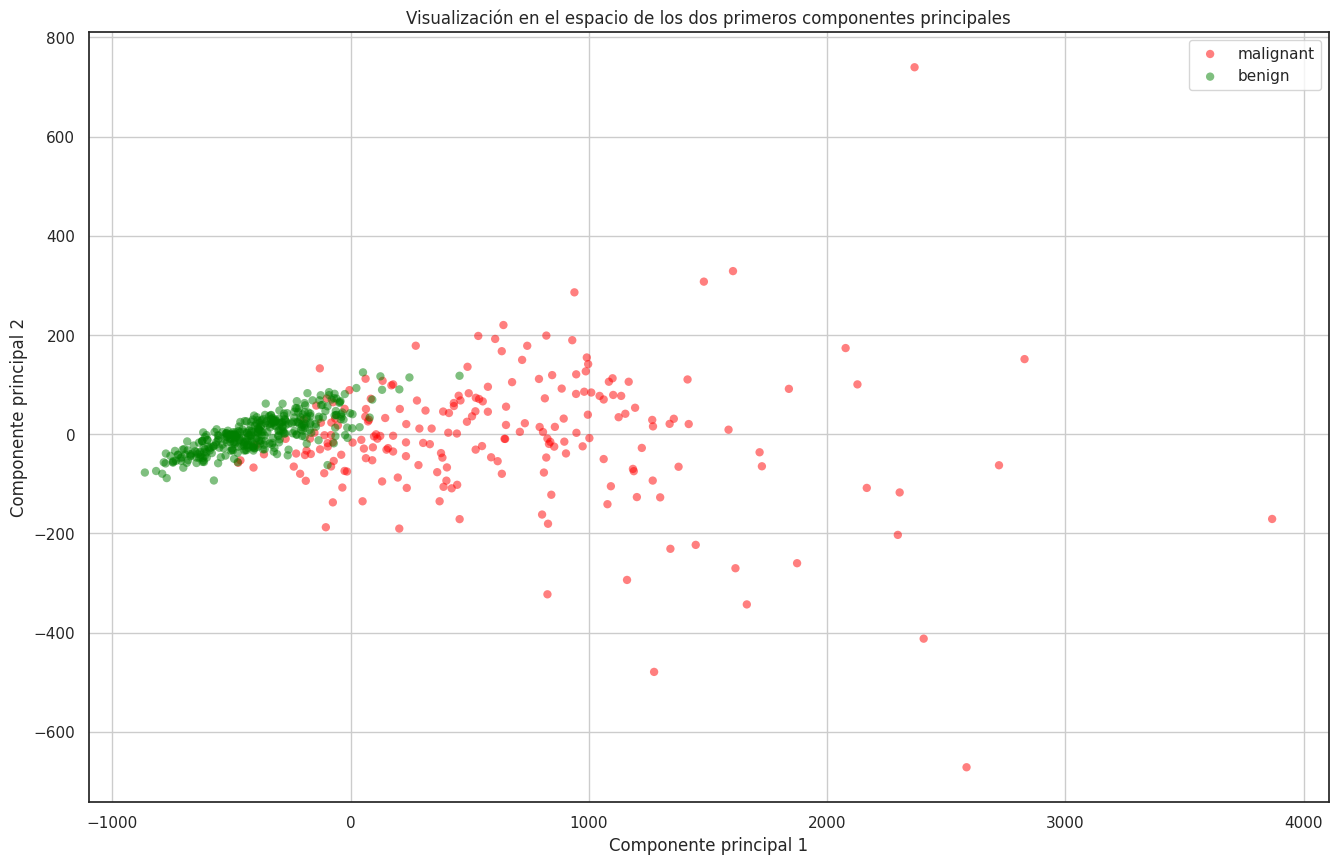

In [66]:
plt.figure(figsize=(16,10))
plt.scatter(projected_breast_cancer[target == 0,0],
            projected_breast_cancer[target == 0,1],
            color='red', 
            edgecolors='none',
            alpha=0.5, 
            label=target_names[0])
plt.scatter(projected_breast_cancer[target == 1, 0],
            projected_breast_cancer[target == 1, 1],
            color='green', 
            edgecolors='none', 
            label=target_names[1],
            alpha=0.5)
plt.grid(True)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Visualización en el espacio de los dos primeros componentes principales')
plt.legend()
plt.show()

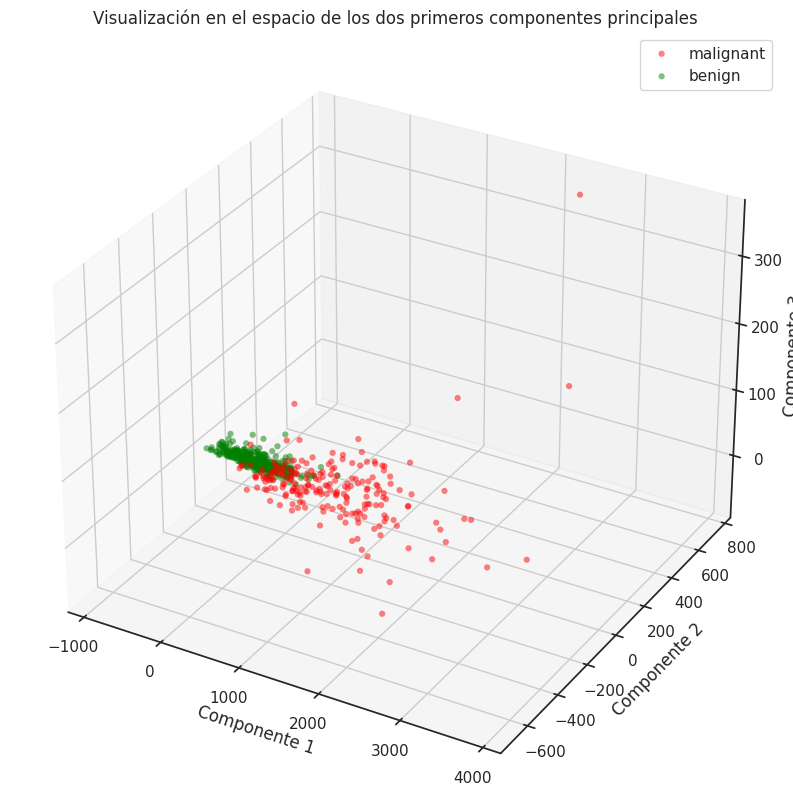

In [65]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})
ax.scatter3D(projected_breast_cancer[target == 0,0],
            projected_breast_cancer[target == 0,1],
            projected_breast_cancer[target == 0,2],
            color='red', 
            edgecolors='none',
            alpha=0.5, 
            label=target_names[0])
ax.scatter3D(projected_breast_cancer[target == 1, 0],
             
            projected_breast_cancer[target == 1, 1],
            projected_breast_cancer[target == 1, 2],
            color='green', 
            edgecolors='none', 
            label=target_names[1],
            alpha=0.5)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.legend()
plt.title('Visualización en el espacio de los dos primeros componentes principales')
plt.show()

>Visualización interactiva en 3D instalar plotly, nbconvert y reiniciar kernel

In [66]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame({
    'Componente 1': projected_breast_cancer[:, 0],
    'Componente 2': projected_breast_cancer[:, 1],
    'Componente 3': projected_breast_cancer[:, 2],
    'Target': target_names[target]
})

# Create the 3D scatter plot using Plotly
fig = px.scatter_3d(df, x='Componente 1',
                    y='Componente 2',
                    z='Componente 3',
                    color='Target',
                    opacity=0.5, 
                    title='Visualización en el espacio de los tres primeros componentes principales',
                    symbol='Target', 
                    size_max=3)
fig.update_traces(marker=dict(size=2))
fig.update_layout(width=800, height=600)  # Set your desired width and height
fig.update_layout(scene_camera=dict(eye=dict(x=1, y=1, z=1)))  # Adjust the values for zoom
# Show the plot
fig.show()

###

## Clasificación

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


names = [
    "LogisticRegression", 
    "Linear SVM",
    "RBF SVM", 
    "Gradient Boosting", 
    "MLP"
]

classifiers = [ 
    LogisticRegression(max_iter=1000),
    SVC(kernel='linear', C=0.025),
    SVC(gamma=2, kernel='rbf'),
    GradientBoostingClassifier(n_estimators=120),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    ]

Primero se revisa si las clases están desbalanceadas

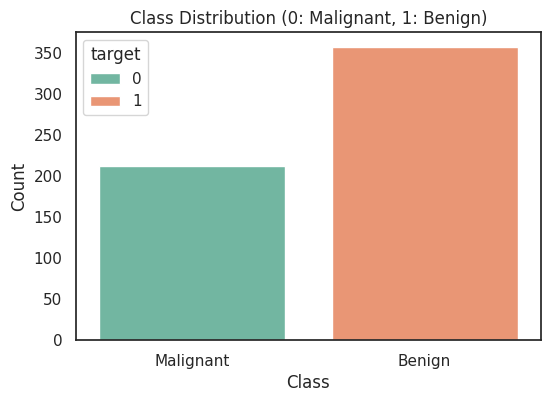

In [184]:
plt.figure(figsize=(6,4))
sns.countplot(data=breast_cancer.frame, x='target', palette='Set2', hue='target')
plt.title('Class Distribution (0: Malignant, 1: Benign)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.show()

Se puede observar que existe un desbalanceo de clases

In [185]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [191]:
def train_and_eval_classifiers(X_train, y_train, X_test, y_test, classifiers, names, n_components) -> list:
    """Train and evaluate multiple classifiers using pipelines and PCA.

    Args:
        X_train (array-like): Training data.
        y_train (array-like): Training labels.
        X_test (array-like): Test data.
        y_test (array-like): Test labels.
        classifiers (list): List of classifier instances.
        names (list): List of classifier names.
        n_components (int): Number of components for PCA.

    Returns:
        list: List of trained pipelines.
    """
    print(f"Training and evaluating classifiers with {n_components} components of PCA")
    print('-' * 30)

    pipelines = []
    for name, clf in zip(names, classifiers):
        pipeline = Pipeline([
            ('pca', PCA(n_components=n_components)),
            (name, clf)
        ])
        pipelines.append(pipeline)

        # Fit each classifier:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        print(f'{name} Metrics:')
        print(f'Accuracy: {accuracy:.2f}')
        print(f'Sensitivity (Recall): {sensitivity:.2f}')
        print(f'F1-Score: {f1:.2f}')
        print(f'Precision: {precision:.2f}')

        # Plot the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malignant", "Benign"])
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

        print('-' * 30)

    return pipelines

### 2 Componentes

Training and evaluating classifiers with 2 components of PCA
------------------------------
LogisticRegression Metrics:
Accuracy: 0.96
Sensitivity (Recall): 0.97
F1-Score: 0.97
Precision: 0.97


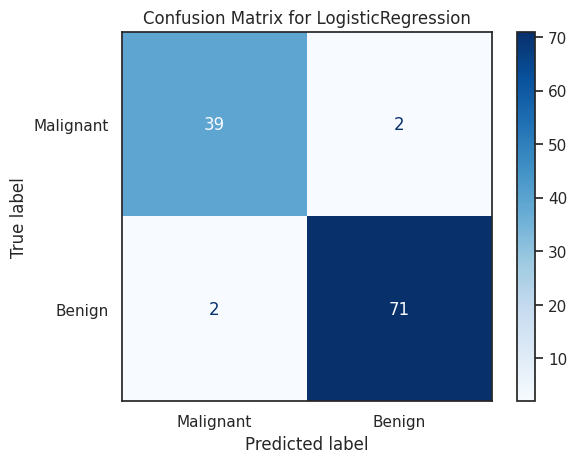

------------------------------
Linear SVM Metrics:
Accuracy: 0.97
Sensitivity (Recall): 0.99
F1-Score: 0.98
Precision: 0.97


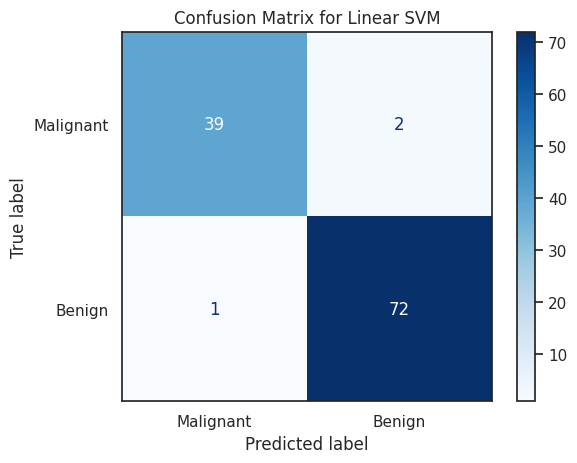

------------------------------
RBF SVM Metrics:
Accuracy: 0.64
Sensitivity (Recall): 1.00
F1-Score: 0.78
Precision: 0.64


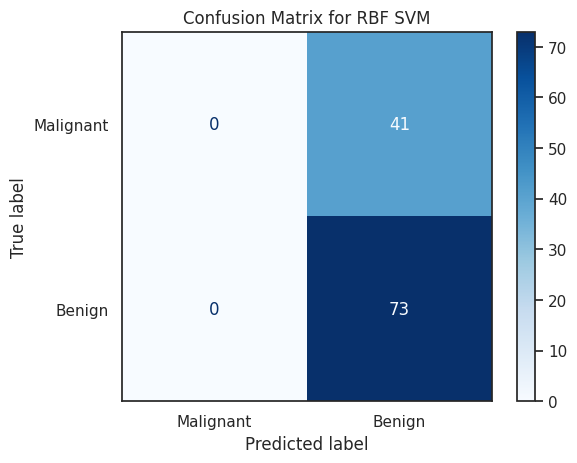

------------------------------
Gradient Boosting Metrics:
Accuracy: 0.95
Sensitivity (Recall): 0.95
F1-Score: 0.96
Precision: 0.97


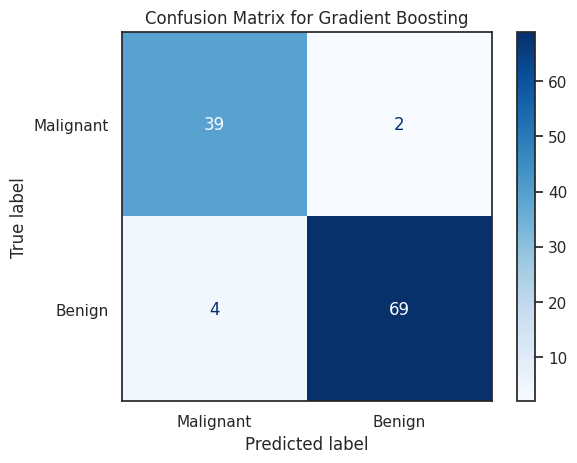

------------------------------
MLP Metrics:
Accuracy: 0.96
Sensitivity (Recall): 0.96
F1-Score: 0.97
Precision: 0.97


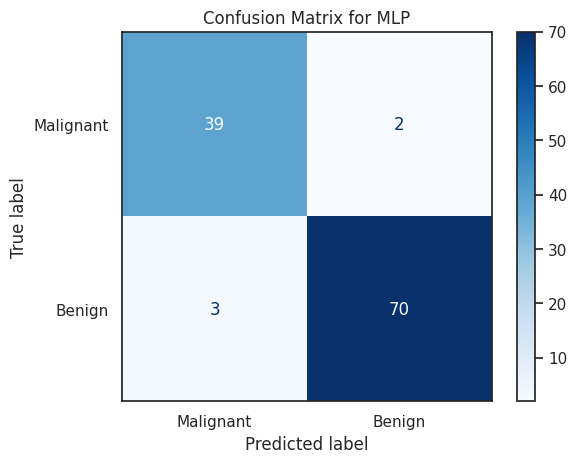

------------------------------
CPU times: user 2.16 s, sys: 7.3 s, total: 9.46 s
Wall time: 1 s


In [192]:
%%time
pipelines_2 = train_and_eval_classifiers(X_train, y_train, X_test, y_test, classifiers, names,n_components=2)


## 5 Componentes

Training and evaluating classifiers with 5 components of PCA
------------------------------
LogisticRegression Metrics:
Accuracy: 0.95
Sensitivity (Recall): 0.96
F1-Score: 0.96
Precision: 0.96


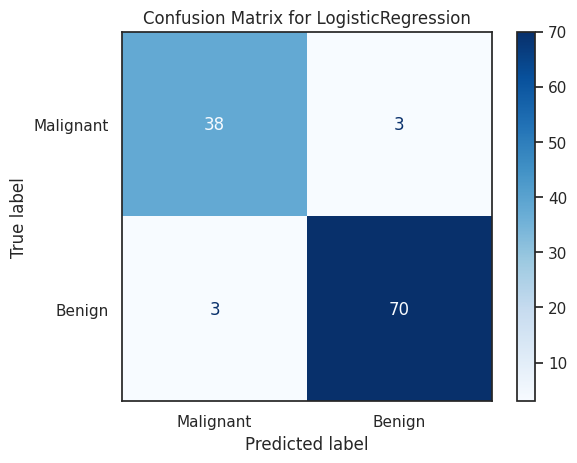

------------------------------
Linear SVM Metrics:
Accuracy: 0.95
Sensitivity (Recall): 0.96
F1-Score: 0.96
Precision: 0.96


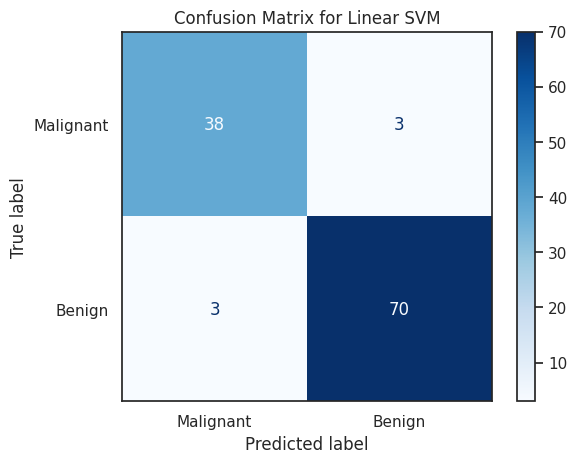

------------------------------
RBF SVM Metrics:
Accuracy: 0.64
Sensitivity (Recall): 1.00
F1-Score: 0.78
Precision: 0.64


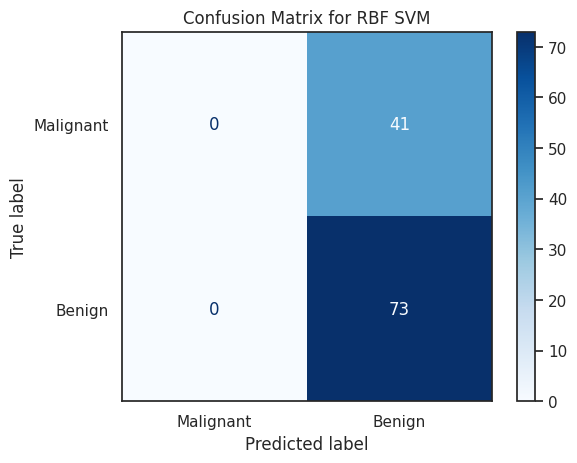

------------------------------
Gradient Boosting Metrics:
Accuracy: 0.96
Sensitivity (Recall): 0.97
F1-Score: 0.97
Precision: 0.96


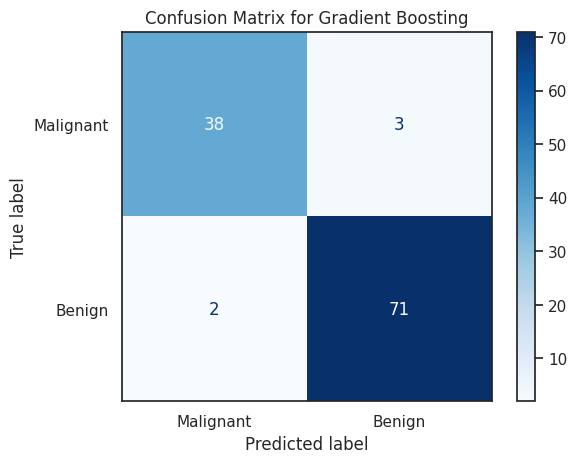

------------------------------
MLP Metrics:
Accuracy: 0.96
Sensitivity (Recall): 0.99
F1-Score: 0.97
Precision: 0.95


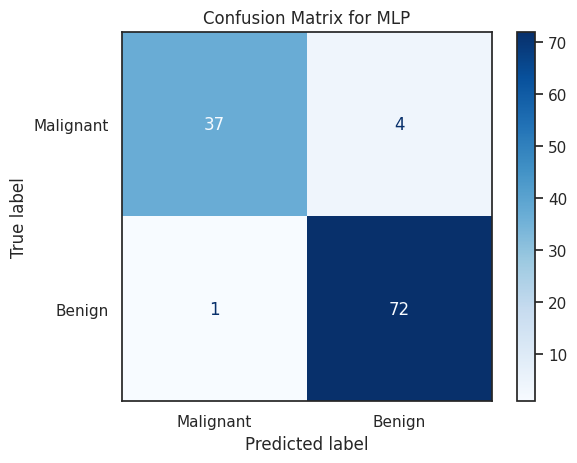

------------------------------
CPU times: user 1.88 s, sys: 5.46 s, total: 7.34 s
Wall time: 954 ms


In [188]:
%%time
pipelines_3 = train_and_eval_classifiers(X_train, y_train, X_test, y_test, classifiers, names,n_components=5)

## Resultados

:

### Con 2 componentes de PCA:

#### LogisticRegression:
- Accuracy: 0.96
- Sensitivity (Recall): 0.97
- F1-Score: 0.97
- Precision: 0.97

#### Linear SVM:
- Accuracy: 0.97
- Sensitivity (Recall): 0.99
- F1-Score: 0.98
- Precision: 0.97

#### RBF SVM:
- Accuracy: 0.64
- Sensitivity (Recall): 1.00
- F1-Score: 0.78
- Precision: 0.64

#### Gradient Boosting:
- Accuracy: 0.95
- Sensitivity (Recall): 0.95
- F1-Score: 0.96
- Precision: 0.97

#### MLP (Multilayer Perceptron):
- Accuracy: 0.96
- Sensitivity (Recall): 0.96
- F1-Score: 0.97
- Precision: 0.97

### Con 5 componentes de PCA:

#### LogisticRegression:
- Accuracy: 0.95
- Sensitivity (Recall): 0.96
- F1-Score: 0.96
- Precision: 0.96

#### Linear SVM:
- Accuracy: 0.95
- Sensitivity (Recall): 0.96
- F1-Score: 0.96
- Precision: 0.96

#### RBF SVM:
- Accuracy: 0.64
- Sensitivity (Recall): 1.00
- F1-Score: 0.78
- Precision: 0.64

#### Gradient Boosting:
- Accuracy: 0.96
- Sensitivity (Recall): 0.97
- F1-Score: 0.97
- Precision: 0.96

#### MLP (Multilayer Perceptron):
- Accuracy: 0.96
- Sensitivity (Recall): 0.99
- F1-Score: 0.97
- Precision: 0.95

### Análisis:

1. El número de componentes (`n_components`) en PCA afecta de manera significativa el rendimiento de los modelos. En general, la reducción de dimensionalidad a 2 componentes parece ser suficiente para mantener un buen rendimiento en la mayoría de los clasificadores.

2. Linear SVM muestra un alto rendimiento en términos de sensibilidad y precisión, independientemente del número de componentes. Esto sugiere que es un clasificador robusto ante la reducción de dimensionalidad.

3. RBF SVM tiene un rendimiento invariable con diferentes cantidades de componentes, pero su precisión es notablemente baja, lo que indica que el modelo tiende a clasificar demasiados casos como positivos.

4. Los modelos basados en árboles, como Gradient Boosting, mantienen un rendimiento consistente en ambos casos. Esto sugiere que estos modelos son menos sensibles a la reducción de dimensionalidad.

5. MLP muestra un rendimiento bastante estable en términos de precisión y F1-Score, pero su sensibilidad mejora ligeramente con 5 componentes en lugar de 2.

6. En general, reducir la dimensionalidad a 2 componentes de PCA proporciona un equilibrio razonable entre simplificación y rendimiento en la mayoría de los clasificadores. Sin embargo, la elección del número óptimo de componentes depende del equilibrio deseado entre rendimiento y complejidad del modelo.
